## General Relativity Assignment (Honours)
2019

Numerical Integration of the equations of motion in the wormhole metric.

For this assignment the initial location of

$$u^{\alpha}(\tau=0) = (t_0,r_0,\theta_0,\phi_0)= \left(0,R,\frac{\pi}{2},0\right)$$

with an initial 4-velocity give by

$$u^{\alpha}(\tau=0)=\left(\sqrt{1+C^2(R^2+b^2)},0,0,C\right)$$

see pdf for details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
def IVP(t,x0,u0,b): 
    '''
    Function to solve the initial value problem of a massive object on its
    world-line in a wormhole. This function uses fourth order-Runge Kutta

    :param t np.array:  an array of the proper time       
    :param x0:          an array containing the initial position 
                        [t_0,r_0,theta_0,phi_0]
    :param u0:          an array containing the initial velocity
                        [u_t(tau=0), u_r(tau=0), u_theta(tau=0), u_phi(tau=0)]
    :param b:

    :return tuple:      a tuple containing position (x), velocity (u) and 
                        normalisation of four velocity (udotu)
    '''

    def rhs(x,u,dt):
        '''
        Right hand side function for solving the initial value problem

        :param x array:     an araray of current position
        :param u array:     an array of current velocity
        :param dt float:    the time step

        :return tuple:      a tuple containing approimations of the new
                            position and velocity
        '''
        dx[0],dx[1],dx[2],dx[3] = u[0],u[1],u[2],u[3]
        
        du[0] = 0
        du[1] = x[1]*(u[2]**2+np.sin(x[2])**2*u[3]**2)
        du[2] = np.sin(x[2])*np.cos(x[2])*u[3]**2-(2*x[1]*u[1]*u[2])/(b**2+x[1]**2)
        du[3] = -2*((u[2]*u[3])/(np.tan(x[2]))+(x[1]*u[1]*u[3])/(b**2+x[1]**2))
        
        return dt*dx, dt*du
    
    xstep = np.array([x0,u0])
    x = np.zeros((len(t),4))
    u = np.zeros((len(t),4))
    udotu = np.zeros(len(t))
    # included for completeness
    udota = np.zeros(len(t))
    adota = np.zeros(len(t))

    x[0] = x0
    u[0] = u0
    udotu[0] = -u0[0]**2+ u0[1]**2+(b**2+x0[1]**2)*u0[2]**2+(b**2+x0[1]**2)*np.sin(x0[2])**2*u0[3]**2
    
    f1 = np.zeros((1,4))
    f2 = np.zeros((1,4))
    f3 = np.zeros((1,4))
    f4 = np.zeros((1,4))
    dx = np.zeros(4)
    du = np.zeros(4)
    diff = np.diff(t)
    
    for n in np.arange(1,len(t)):
        dt = diff[n-1]
         
        f1 = rhs(xstep[0],xstep[1],dt)
        f2 = rhs(xstep[0]+0.5*f1[0],xstep[1] + 0.5*f1[1],dt)
        f3 = rhs(xstep[0]+0.5*f2[0],xstep[1] + 0.5*f2[1],dt)
        f4 = rhs(xstep[0]+f3[0],xstep[1] + f3[1],dt)     
        
        xstep[0] = xstep[0] + (f1[0]+2*f2[0]+2*f3[0]+f4[0])/6
        xstep[1] = xstep[1] + (f1[1]+2*f2[1]+2*f3[1]+f4[1])/6
        
        x[n] = xstep[0]
        u[n] = xstep[1]
        udotu[n] = -u[n,0]**2+ u[n,1]**2+(b**2+x[n,1]**2)*u[n,2]*2+(b**2+x[n,1]**2)*np.sin(x[n,2])**2*u[n,3]**2
    return x, u, udotu

5.412420374999783


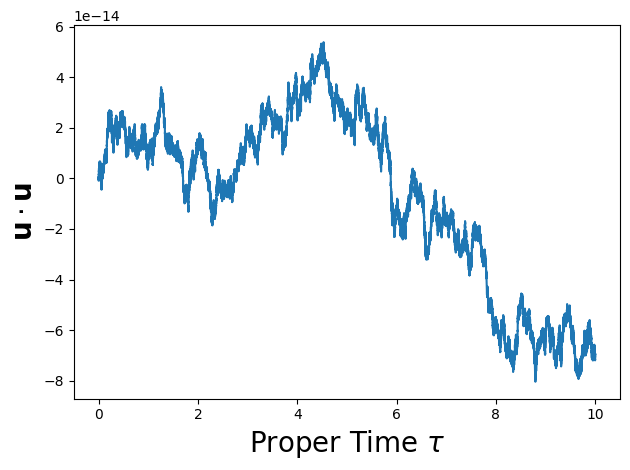

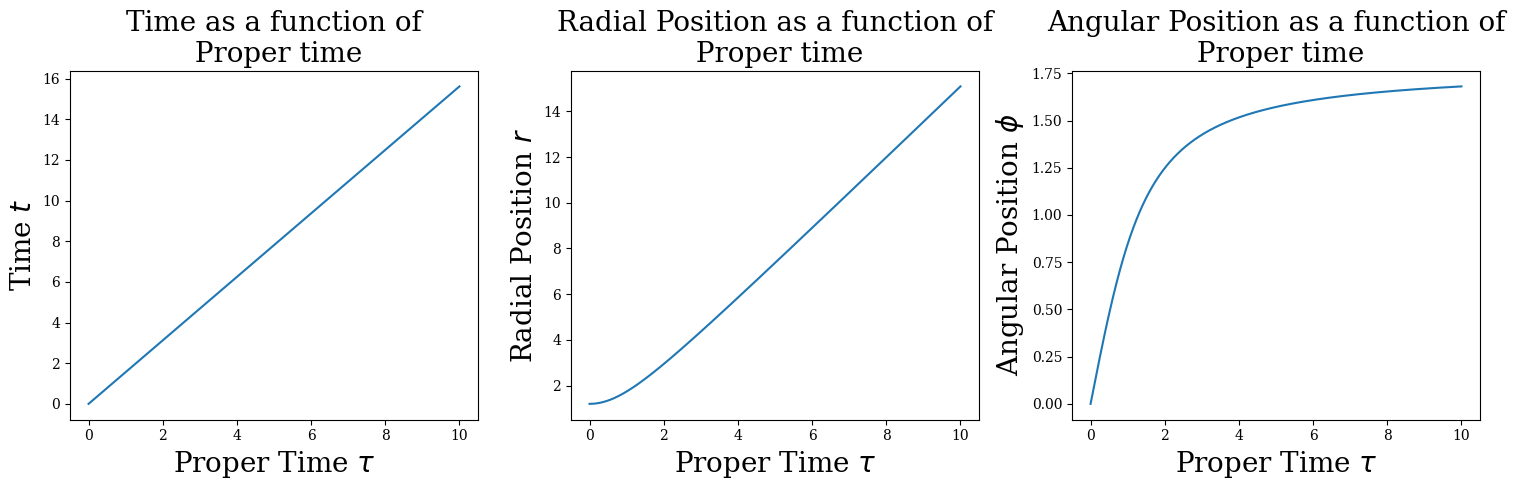

In [3]:
# Example usage

C=1
b=1
R=1.2
nsteps = 20000
t = np.arange(0,10,1/nsteps)
t1 = time.perf_counter()
x0 = np.array([0,R,np.pi/2,0])
u0 = np.array([(C**2*(R**2+b**2))**(1/2),0,0,C])
x,u,udotu = IVP(t,x0,u0,b)
print(time.perf_counter() -t1)
tau=t
t = x[:,0]
pos = x[:,1]
theta = x[:,2]
phi = x[:,3]

fig = plt.subplots()
use_latex_font = False # If latex font installed set True
plt.rc('text', usetex=use_latex_font)
plt.rc('font', family='serif')
plt.plot(tau,udotu)

plt.ticklabel_format(useOffset=False)

plt.xlabel(r'Proper Time $\tau$',fontsize=20)
plt.ylabel(r'$\mathbf{u}\cdot\mathbf{u}$',fontsize=20);
plt.tight_layout()

fig, ax = plt.subplots(1,3,figsize=(15,5))
plt.rc('text', usetex=use_latex_font)
plt.rc('font', family='serif')

ax[0].plot(tau,t)
ax[0].set_xlabel(r'Proper Time $\tau$',fontsize=20)
ax[0].set_ylabel(r'Time $t$',fontsize=20)
ax[0].set_title('Time as a function of\n Proper time',fontsize=20)

ax[1].plot(tau,pos)
ax[1].set_xlabel(r'Proper Time $\tau$',fontsize=20)
ax[1].set_ylabel(r'Radial Position $r$',fontsize=20)
ax[1].set_title('Radial Position as a function of\n Proper time',fontsize=20)

ax[2].plot(tau,phi)
ax[2].set_xlabel(r'Proper Time $\tau$',fontsize=20)
ax[2].set_ylabel(r'Angular Position $\phi$',fontsize=20)
ax[2].set_title('Angular Position as a function of\n Proper time',fontsize=20)
plt.tight_layout()